# Построение Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pipeline from sklearn2pmml

In [ ]:
!pip install sklearn2pmml

In [ ]:
!pip install pypmml

## Import Libraries

In [ ]:
import pandas as pd
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn. metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from xgboost import XGBClassifier

## Load Dataset

In [ ]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data = pd.read_csv('/content/drive/MyDrive/Datasets/adult.csv', names=col_names)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Описание набора данных "Adult":

| Характеристика | Описание |
| --- | --- |
| Название | Adult (Census Income) |
| Дата добавления | 30 апреля 1996 |
| Задача | Предсказать, превышает ли доход человека $50,000 в год на основе данных переписи населения. |
| Предметная область | Социальные науки |
| Тип задачи | Классификация |
| Тип характеристик | Категориальные, целочисленные |
| Количество наблюдений | 48842 |
| Количество характеристик | 14 |
| Отсутствующие значения | Да |

### Описание переменных:

| Имя переменной | Роль | Тип | Демография | Описание | Единицы | Отсутствующие значения |
| --- | --- | --- | --- | --- | --- | --- |
| age | Характеристика | Целое | Возраст | - | - | Нет |
| workclass | Характеристика | Категориальный | Доход | Работает у частного работодателя, самозанятый без сотрудников, самозанятый с сотрудниками, федеральное правительство, местное правительство, государственное правительство, без оплаты, никогда не работал. | - | Да |
| fnlwgt | Характеристика | Целое | - | - | - | Нет |
| education | Характеристика | Категориальный | Уровень образования | Бакалавр, некоторое количество курсов в колледже, 11-й класс, окончил среднюю школу, профессиональная школа, аспирантура, профессиональное образование, 9-й класс, 7-8-й классы, 12-й класс, магистр, 1-4-й классы, 10-й класс, доктор наук, 5-6-й классы, дошкольное образование. | - | Нет |
| education-num | Характеристика | Целое | Уровень образования | - | - | Нет |
| marital-status | Характеристика | Категориальный | Другое | Женаты, разведены, никогда не были женаты, живут раздельно, овдовели, женаты, но супруг отсутствует, женаты на члене вооруженных сил. | - | Нет |
| occupation | Характеристика | Категориальный | Другое | Специалист по технической поддержке, ремесленник, работник обслуживания, продажи, менеджер, профессионал, рабочие физического труда, инспектор, клерк, сельское хозяйство и рыболовство, транспорт, частный домохозяин, полиция, вооруженные силы. | - | Да |
| relationship | Характеристика | Категориальный | Другое | Супруга, собственный ребенок, муж, не родственник, другой родственник, неженатый. | - | Нет |
| race | Характеристика | Категориальный | Раса | Белый, азиат или житель тихоокеанского региона, индеец или эскимос, другое, черный. | - | Нет |
| sex | Характеристика | Бинарный | Пол | Женщина, мужчина. | - | Нет |
| capital-gain | Характеристика | Целое | - | - | - | Нет |
| capital-loss | Характеристика | Целое | - | - | - | Нет |
| hours-per-week | Характеристика | Целое | - | - | - | Нет |
| native-country | Характеристика | Категориальный | Другое | Страна рождения (США, Камбоджа, Англия, Пуэрто-Рико, Канада, Германия и т.д.) | - | Да |
| income | Целевая переменная | Бинарный | Доход | >50K, <=50K. | - | Нет |


In [ ]:
data_copy = data
data_copy

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Видим, что в наборе данных пропусков нет

In [ ]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


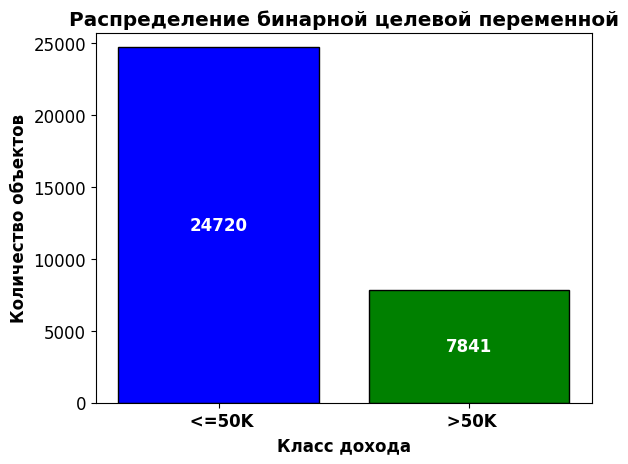

In [ ]:
import matplotlib.pyplot as plt

# Расчет количества объектов в каждом классе
class_counts = data['income'].value_counts()

# Создание столбчатой диаграммы
colors = ['blue', 'green']
plt.bar(class_counts.index, class_counts.values, color=colors, edgecolor='black', width=0.8)

plt.xlabel('Класс дохода', fontweight='bold')
plt.ylabel('Количество объектов', fontweight='bold')
plt.title('Распределение бинарной целевой переменной', fontweight='bold')
plt.ylim(0, class_counts.max() + 1000)  # Установить предел по оси Y
plt.xticks(rotation=0, fontweight='bold')

# Добавление количества объектов в каждом классе на столбчатую диаграмму
for i, count in enumerate(class_counts):
    plt.text(i, count / 2, str(count), ha='center', va='center', color='white', fontweight='bold')

plt.show()


Видим, что классы целевой переменной несбалансированные, поэтому будем применять стратификацию при разделении данных на тренировочную и тестовую выборки

# Data Preprocessing

## Преобразование категориальных признаков в численные

In [ ]:
# Определить столбцы с двумя уникальными значениями
binary_cols = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() == 2]

# Определить столбцы для кодирования
encode_cols = [col for col in data.columns if data[col].dtype == 'object' and col not in binary_cols]

# Заменить значения на 0 и 1 в столбцах с двумя уникальными значениями
for col in binary_cols:
    data[col] = data[col].map({label: i for i, label in enumerate(data[col].unique())})

# Кодирование остальных столбцов с типом object
for col in encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital_gain    32561 non-null  int64
 11  capital_loss    32561 non-null  int64
 12  hours_per_week  32561 non-null  int64
 13  native_country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


Видим, что все признаки теперь имеют целочисленный тип

In [ ]:
data.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.330795,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [ ]:
data.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,-0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,-0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,-0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education_num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,-0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital_status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,-0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,-0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,-0.088832,-0.095981,-0.026858,0.027356,-0.012280,0.129314,-0.080296,0.582454,-0.087204,1.000000,-0.048480,-0.045567,-0.229309,0.008119,-0.215980


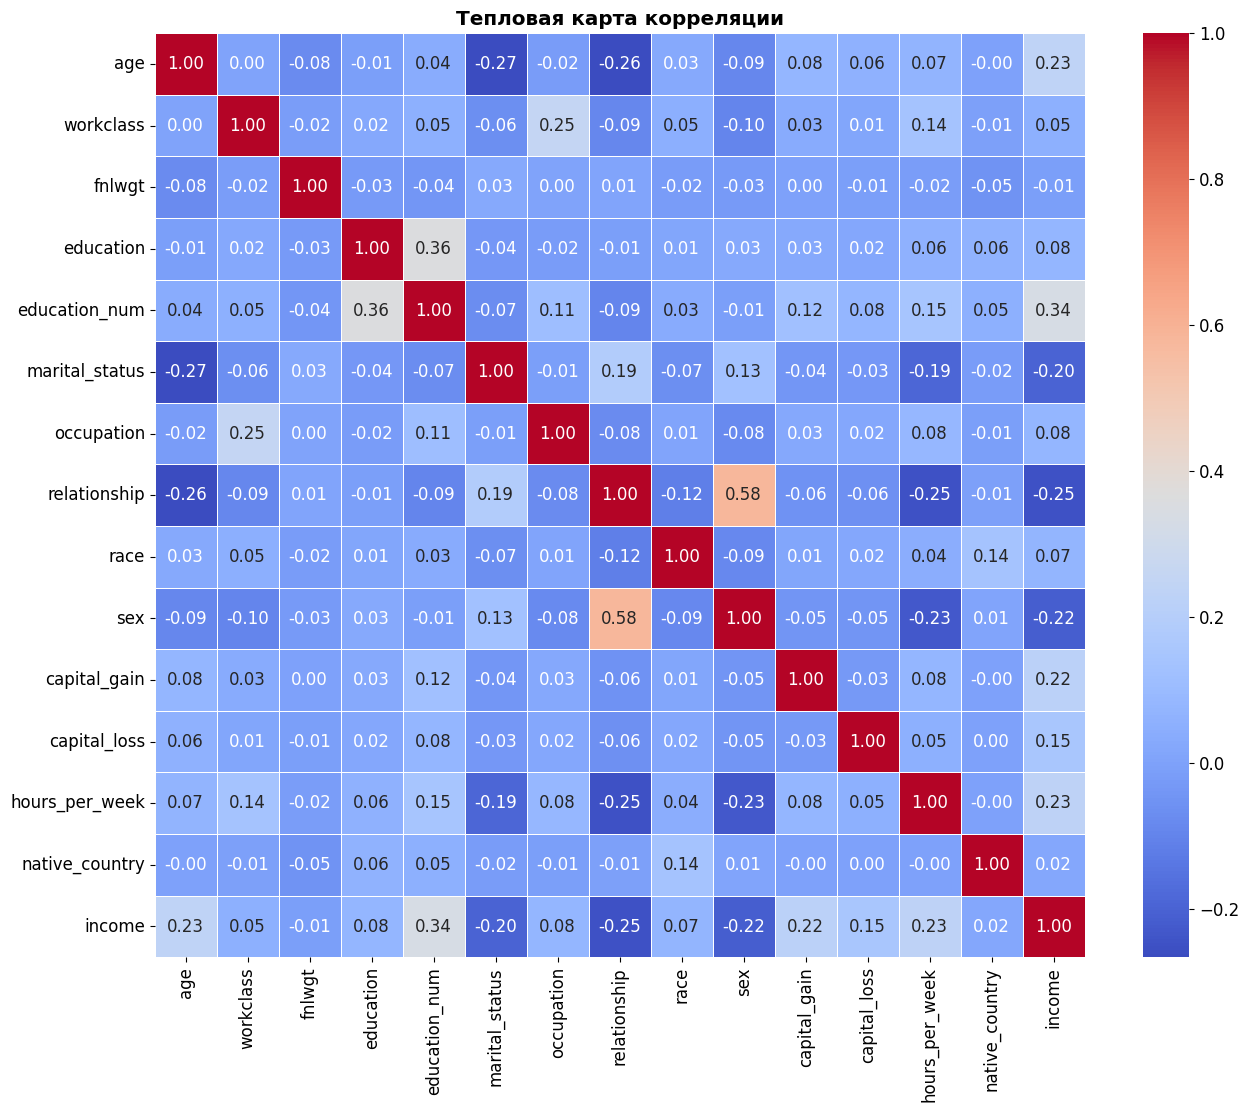

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Посчитать корреляцию
corr = data.corr()

# Создать тепловую карту
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляции', fontweight='bold')
plt.show()


Видим, что 5 признаков в наборе данных оказывают незначительное влияние на целевую переменную и их можно исключить - это workclass, fnlwgt, occupation, race, native_country

In [ ]:
data = data.drop(['workclass', 'fnlwgt', 'occupation', 'race', 'native_country'], axis=1)
data

,age,education,education_num,marital_status,relationship,sex,capital_gain,capital_loss,hours_per_week,income
0,39,9,13,4,1,0,2174,0,40,0
1,50,9,13,2,0,0,0,0,13,0
2,38,11,9,0,1,0,0,0,40,0
3,53,1,7,2,0,0,0,0,40,0
4,28,9,13,2,5,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,7,12,2,5,1,0,0,38,0
32557,40,11,9,2,0,0,0,0,40,1
32558,58,11,9,6,4,1,0,0,40,0
32559,22,11,9,4,3,0,0,0,20,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   education       32561 non-null  int64
 2   education_num   32561 non-null  int64
 3   marital_status  32561 non-null  int64
 4   relationship    32561 non-null  int64
 5   sex             32561 non-null  int64
 6   capital_gain    32561 non-null  int64
 7   capital_loss    32561 non-null  int64
 8   hours_per_week  32561 non-null  int64
 9   income          32561 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [ ]:
data.describe()

,age,education,education_num,marital_status,relationship,sex,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.298210,10.080679,2.611836,1.446362,0.330795,1077.648844,87.303830,40.437456,0.240810
std,13.640433,3.870264,2.572720,1.506222,1.606771,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,9.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,11.000000,10.000000,2.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,12.000000,4.000000,3.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,15.000000,16.000000,6.000000,5.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


## Model Train and Predict

# Библиотека функций

### Функция для подсчета метрик качества модели бинарной классификации

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_classification_metrics(y_true, y_pred,  y_pred_proba, model_name):
    """
    Функция для подсчета метрик качества модели бинарной классификации.

    Аргументы:
    y_true -- истинные значения целевой переменной
    y_pred -- предсказанные значения целевой переменной
    y_pred_proba -- вероятности предсказаний (для бинарной классификации)
    model_name -- название модели

    Возвращает словарь с названиями метрик и их значениями.
    """
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred_proba[:,1]),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'Confusion Matrix': confusion_matrix(y_true, y_pred).tolist()
    }

    return metrics

In [ ]:
X = data.drop('income', axis=1)
y = data['income']

### Разделение данных на тренировочную и тестовую часть с использованием стратификации

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

### Подбор гиперпараметров модели

In [ ]:
from sklearn.model_selection import GridSearchCV

# Определение сетки гиперпараметров
param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.1, 0.3, 0.5],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__gamma': [0, 0.1, 0.2]
}

# Создание конвейера
pipeline = PMMLPipeline([
    ('scaler', RobustScaler()),
    ('selector', SelectKBest(k=8)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=2)

# Обучение конвейера с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Лучшие гиперпараметры
print("Лучшие гиперпараметры:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   1.0s
[CV] END classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.1

In [ ]:
# Обучение конвейера с лучшими гиперпараметрами на всех данных
pipeline = grid_search.best_estimator_
pipeline.fit(X, y)

PMMLPipeline(steps=[('scaler', RobustScaler()),
       ('selector', SelectKBest(k=8)),
       ('classifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...))])

In [ ]:
res = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)
# Преобразование вероятностей в формат [negative, positive]
y_pred_proba = y_pred_proba[:, ::-1]

In [ ]:
metrics = calculate_classification_metrics(y_test, res, y_pred_proba, 'Model XGBoost in Pipeline')
print("Метрики качества модели:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model XGBoost in Pipeline
Accuracy: 0.8711148334263912
ROC AUC: 0.06924850319027642
Precision: 0.7988077496274217
Recall: 0.6213292117465224
F1 Score: 0.6989784829384916
Confusion Matrix: [[7753, 405], [980, 1608]]


In [ ]:
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      8158
           1       0.80      0.62      0.70      2588

    accuracy                           0.87     10746
   macro avg       0.84      0.79      0.81     10746
weighted avg       0.87      0.87      0.87     10746



<Axes: >

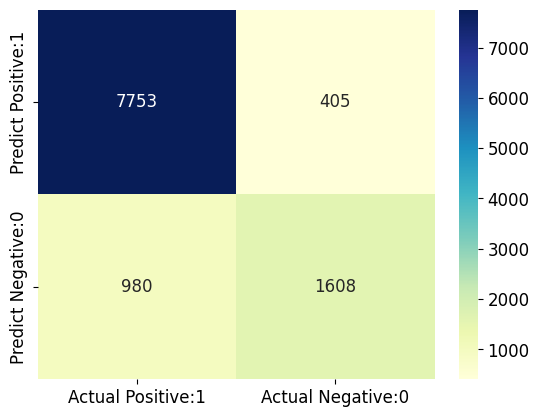

In [ ]:
# Вычисление матрицы путаницы
lr_confusion_matrix = confusion_matrix(y_test, res)

# Визуализация матрицы путаницы
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

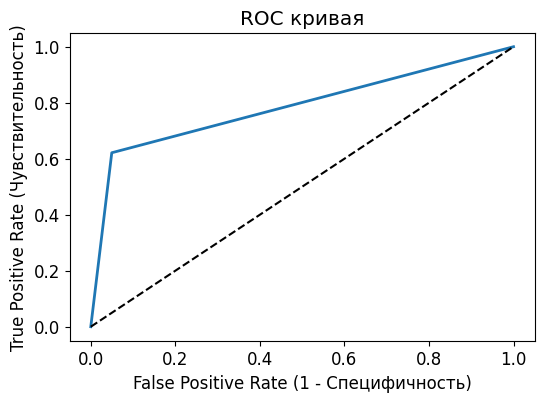

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, res, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC кривая')

plt.xlabel('False Positive Rate (1 - Специфичность)')

plt.ylabel('True Positive Rate (Чувствительность)')

plt.show()

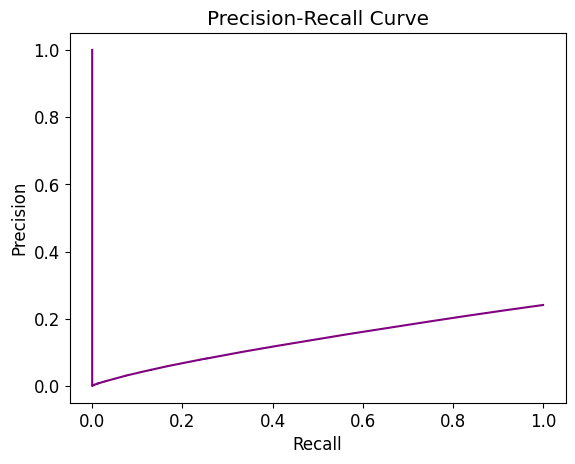

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

# Сохранение модели в формате pmml. Реализация чтения модели, вывод на экран предсказания для любого объекта значения целевой функции

In [ ]:
# Сохранение модели в формате PMML на Google Drive
import os

model_path = '/content/drive/MyDrive/Datasets/model.pmml'
sklearn2pmml(pipeline, model_path, with_repr=True)

# Вывод размера модели на экран
model_size = os.path.getsize(model_path)
model_size_mb = model_size / (1024)
print("Размер модели:", model_size_mb, "КБ")

Размер модели: 217.6083984375 КБ


In [ ]:
# Чтение модели из файла PMML
from pypmml import Model
model = Model.fromFile(model_path)

# Сделаем предсказание целевой переменной на основе совокупностей признаков 1 случайно выбранного объекта из ИСХОДНОГО НАБОРА данных

In [ ]:
# Функция для преобразования результатов предсказания в виде вероятностей в название класса
def pmml_predict(model, X):
    preds = model.predict(X)
    y_pred = ['<=50K' if p == 0 else '>50K' for p in preds]
    return y_pred

# Создание словаря для отображения кодов классов в их названия
class_dict = {0: '<=50K', 1: '>50K'}

# Выбор одного случайного объекта из data_copy
random_object = data_copy.sample(n=1)

# Вывод объекта на экран
print("Объект:", random_object)

# Сохранение истинного класса
true_class = random_object['income'].iloc[0]

# Удаление столбца 'income', так как это класс, который нужно предсказать
random_object = random_object.drop('income', axis=1)

# Преобразование категориальных признаков с помощью LabelEncoder
le_encoders = {
    'workclass': LabelEncoder(),
    'education': LabelEncoder(),
    'marital_status': LabelEncoder(),
    'occupation': LabelEncoder(),
    'relationship': LabelEncoder(),
    'race': LabelEncoder(),
    'sex': LabelEncoder(),
    'native_country': LabelEncoder()
}

# Обратные преобразования для LabelEncoder
le_decoders = {col: encoder for col, encoder in le_encoders.items()}

for col, encoder in le_encoders.items():
    random_object[col] = encoder.fit_transform(random_object[col])

# Предсказание для одного объекта
pred = pmml_predict(model, random_object)

# Раскодирование истинного класса
true_class_decoded = class_dict[true_class]

print("Predicted Class:", pred[0], ", True Class:", true_class_decoded)

Объект:        age  workclass  fnlwgt  education  education_num  marital_status  \
32554   53          4  321865         12             14               2   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
32554           4             0     4    0             0             0   

       hours_per_week  native_country  income  
32554              40              39       1  
Predicted Class: >50K , True Class: >50K


# Сделаем предсказание целевой переменной на основе своей совокупности признаков 1 объекта

In [ ]:
# Добавление истинного класса для демонстрационных целей
new_data = pd.DataFrame([[39, 'State-gov', 77516, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 40, 'United-States', '>50K']],
                       columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])

# Сохранение истинного класса
true_class = new_data['income'].iloc[0]

# Удаление столбца 'income', так как это класс, который нужно предсказать
new_data = new_data.drop('income', axis=1)

# Преобразование категориальных признаков с помощью LabelEncoder
le_encoders = {
    'workclass': LabelEncoder(),
    'education': LabelEncoder(),
    'marital_status': LabelEncoder(),
    'occupation': LabelEncoder(),
    'relationship': LabelEncoder(),
    'race': LabelEncoder(),
    'sex': LabelEncoder(),
    'native_country': LabelEncoder()
}

for col, encoder in le_encoders.items():
    new_data[col] = encoder.fit_transform(new_data[col])

# Функция для преобразования результатов предсказания в виде вероятностей в название класса
def pmml_predict(model, X):
    preds = model.predict(X)
    y_pred = ['<=50K' if p[0] > p[1] else '>50K' for p in preds]
    return y_pred

# Предсказание для новых данных
pred = pmml_predict(model, new_data)

# Вывод предсказанного класса и истинного класса в одной строке
print("Predicted Class:", pred[0], ", True Class:", true_class)

Predicted Class: >50K , True Class: >50K
